In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
cf.go_offline()
import seaborn as sns

In [2]:
os.chdir('D:\MSBA Semester 3\BAN 632\Term Project') 

In [3]:
df_1 = pd.read_csv("big_data.csv")
df_2 = pd.read_csv("big_data_1.csv")

## FIRST STEP:

### Concatenate data from two csv files together. 

In [4]:
df = pd.concat([df_1, df_2])
df = df.reset_index(drop = False)
df = df.drop(df.columns[0], axis =1)


In [5]:
df.columns
df = df.drop(columns=['Unnamed: 0'])

### Clean the price column
#### 1) Removing special characters, outliers and Nan values
#### 2) Change price to float type.
#### 3) Restricting records between 1000 and 150,000 dollars only.


In [6]:
pattern = r"(\W+)"
df["Price"] = df["Price"].str.replace(pattern, "")
df["Price"] = df["Price"].str.replace("Negotiable", "")
df.head()

,Car_Name,Price
0,Bay Area Mobile Mechanic - 2018,4096
1,1997 Toyota T100,800
2,Bay Area Mobile Mechanic - Bay Area Mobile Me...,32
3,bay area mobile mechanic - Bayview auto solu...,36
4,1968 Ford Mustang,600


In [7]:
df["Price"] = df["Price"].replace("",np.NaN)
df["Price"] = df["Price"].astype(float)
df["Price"] = df["Price"][df["Price"] > 1000]
df["Price"] = df["Price"][df["Price"] < 150000]

In [8]:
df = df.dropna()
df =  df.reset_index(drop = True)
df.head()

,Car_Name,Price
0,Bay Area Mobile Mechanic - 2018,4096.0
1,Chrysler 300 2013,14995.0
2,2010 Chevrolet Equinox LS FWD,9991.0
3,1984 GMC Sierra,2500.0
4,2016 Nissan Murano Gun Metallic hatchback,18810.0


In [9]:
#Extract year from car name
pattern = r"([0-9]{4})\b"
df["Year"] = df["Car_Name"].str.extract(pattern)
df["Car_Name"] = df["Car_Name"].str.replace(pattern, "").str.lower()
df.head()

,Car_Name,Price,Year
0,bay area mobile mechanic -,4096.0,2018
1,chrysler 300,14995.0,2013
2,chevrolet equinox ls fwd,9991.0,2010
3,gmc sierra,2500.0,1984
4,nissan murano gun metallic hatchback,18810.0,2016


In [10]:
#drop duplicate records
df_2= df.drop_duplicates(keep=False)
df_2 = df_2.dropna()
df_2 =  df_2.reset_index(drop = True)

In [11]:
df_2.head()

,Car_Name,Price,Year
0,bay area mobile mechanic -,4096.0,2018
1,chrysler 300,14995.0,2013
2,chevrolet equinox ls fwd,9991.0,2010
3,gmc sierra,2500.0,1984
4,nissan murano gun metallic hatchback,18810.0,2016


In [12]:
#change year to float type and keep year values beyond 1900 only
df_2["Year"] = df_2["Year"].astype(float)
df_2 = df_2[df_2["Year"].between(1900,2019)]
df_2 =  df_2.reset_index(drop = True)
df_2.drop(df_2.index[0])

,Car_Name,Price,Year
1,chrysler 300,14995.0,2013.0
2,chevrolet equinox ls fwd,9991.0,2010.0
3,gmc sierra,2500.0,1984.0
4,nissan murano gun metallic hatchback,18810.0,2016.0
5,toyota sienna se,22600.0,2015.0
6,porsche 911 930 turbo,135150.0,1987.0
7,chevrolet c,5000.0,1989.0
8,saab - 9-3 -,13993.0,2001.0
9,"alfa romeo giulia ti sport rwd (1,000 miles)",36000.0,2018.0
10,mazda mazda6 snowflake white pearl mica sedan,15940.0,2017.0


In [13]:
#get a list of all manufacturers
car_names = ["Acura"
,"Aixam"
,"Alfa Romeo"
,"Aston Martin"
,"Audi"
,"Dacia"
,"Bentley"
,"BMW"
,"Bufori"
,"Bugatti"
,"Buick"
,"Cadillac"
,"Chevrolet"
,"Chrysler"
,"Citroen"
,"Daihatsu"
,"Dodge"
,"DR Motor"
,"Ferrari"
,"Fiat"
,"Fisker"
,"Ford"
,"GMC"
,"Holden"
,"Honda"
,"Hyundai"
,"Infiniti"
,"Jaguar"
,"Jeep"
,"Kia"
,"Koenigsegg"
,"Lada"
,"Lamborghini"
,"Lancia"
,"Land Rover"
,"Lexus"
,"Lincoln"
,"Lobini"
,"Lotus"
,"Marcos"
,"Marussia"
,"Maserati"
,"Mastretta"
,"Maybach"
,"Mazda"
,"Mercedes-Benz"
,"MG"
,"Mini"
,"Mitsubishi"
,"Morgan"
,"Nissan"
,"Noble"
,"Opel"
,"Pagani"
,"Perodua"
,"Peugeot"
,"Porsche"
,"Proton"
,"Renault"
,"Rolls Royce"
,"Rover"
,"Scion"
,"SEAT"
,"Skoda Auto"
,"Spyker"
,"SsangYong"
,"Subaru"
,"Suzuki"
,"TAC Motors"
,"Tesla"
,"Toyota"
,"Vauxhall","Volkswagen" ,"Volvo"]
new_cars=[]
for x in car_names:
    new_cars.append(x.lower())

In [14]:
#Retrieve manufacturer from the car name
pattern = ('({})'.format('|'.join(new_cars)))
df_2["Brand_name"] = df_2["Car_Name"].str.extract('({})'.format('|'.join(new_cars)))
df_2["Car_Name"] = df_2["Car_Name"].str.replace(pattern, "")
df_2 = df_2.dropna()
df_2.head(30)

,Car_Name,Price,Year,Brand_name
1,300,14995.0,2013.0,chrysler
2,equinox ls fwd,9991.0,2010.0,chevrolet
3,sierra,2500.0,1984.0,gmc
4,murano gun metallic hatchback,18810.0,2016.0,nissan
5,sienna se,22600.0,2015.0,toyota
6,911 930 turbo,135150.0,1987.0,porsche
7,c,5000.0,1989.0,chevrolet
9,"giulia ti sport rwd (1,000 miles)",36000.0,2018.0,alfa romeo
10,6 snowflake white pearl mica sedan,15940.0,2017.0,mazda
11,challenger torred clearcoat coupe,19970.0,2016.0,dodge


In [15]:
df_2.head(30)

,Car_Name,Price,Year,Brand_name
1,300,14995.0,2013.0,chrysler
2,equinox ls fwd,9991.0,2010.0,chevrolet
3,sierra,2500.0,1984.0,gmc
4,murano gun metallic hatchback,18810.0,2016.0,nissan
5,sienna se,22600.0,2015.0,toyota
6,911 930 turbo,135150.0,1987.0,porsche
7,c,5000.0,1989.0,chevrolet
9,"giulia ti sport rwd (1,000 miles)",36000.0,2018.0,alfa romeo
10,6 snowflake white pearl mica sedan,15940.0,2017.0,mazda
11,challenger torred clearcoat coupe,19970.0,2016.0,dodge


In [16]:
#Calculate the age column, change type of year and price to integer
def subt(element):
    return 2019 - element
df_2["Age"] = df_2["Year"].apply(subt).astype(int)
df_2["Year"] = df_2["Year"].astype(int)
df_2["Price"] = df_2["Price"].astype(int)
df_2.head()

,Car_Name,Price,Year,Brand_name,Age
1,300,14995,2013,chrysler,6
2,equinox ls fwd,9991,2010,chevrolet,9
3,sierra,2500,1984,gmc,35
4,murano gun metallic hatchback,18810,2016,nissan,3
5,sienna se,22600,2015,toyota,4


In [17]:
#Rename columns and consider data with frequency of counts greater than 10
df_2 = df_2.rename(columns={'Car_Name': 'Car Name', 'Year': 'Make Year', "Brand_name": "Manufacturer"})
df_2
counts = df_2["Manufacturer"].value_counts()
counts[counts > 10]

df_2 = df_2[df_2['Manufacturer'].isin(counts[counts > 10].index)]
df_2.head()
df_2.columns

Index(['Car Name', 'Price', 'Make Year', 'Manufacturer', 'Age'], dtype='object')

## Data Analysis
### 1) What is the mean price for different car manufacturers?

In [18]:
model_mean_price = df_2.pivot_table(values='Price', index='Manufacturer', aggfunc=np.mean)
model_mean_price = round(model_mean_price,2)
model_mean_price = model_mean_price.sort_values(by = "Price", ascending = False)
model_mean_price.head()

,Price
Manufacturer,
mercedes-benz,18176.21
jeep,15506.84
dodge,14457.65
subaru,14016.25
chevrolet,13156.61


### Top 10 manufacturers by price 

In [28]:
top_10 = model_mean_price
top_10.head()
top_10.iplot(kind = "bar", title = "Mean Price By Manufacturer")

### 2) What is the average age of cars grouped by their manufacturer?

In [20]:
model_mean_age = df_2.pivot_table(values='Age', index='Manufacturer', aggfunc=[np.min,np.mean,np.max], margins = True)
model_mean_age = round(model_mean_age,2)
model_mean_age = model_mean_age.sort_values(by = ("mean","Age"), ascending = False)
model_mean_age.head()



,amin,mean,amax
,Age,Age,Age
Manufacturer,,,
chevrolet,0,20.24,94
gmc,2,18.27,57
ford,0,16.11,94
cadillac,4,16.06,54
lincoln,1,15.00,50


In [21]:
model_mean_age1 = df_2.pivot_table(values='Age', index='Manufacturer', aggfunc=np.mean, margins = True)
model_mean_age1 = round(model_mean_age1,2)
model_mean_age1
model_mean_age1 = model_mean_age1.sort_values(by = "Age", ascending = False)
top_10_age = model_mean_age1
model_mean_age1.iplot(kind = "bar",title = "Mean Age By Manufacturer")


### 3) Manufacturer Market Share in Used Car Market'?

In [22]:
most_avail = df_2["Manufacturer"].value_counts()
most_avail = most_avail.to_frame(name = "Count")
most_avail['Manufacturer'] = most_avail.index
most_avail.set_index("Manufacturer")
most_avail = most_avail[:10]
most_avail.iplot(kind='pie', labels= "Manufacturer", values='Count', hoverinfo="label+percent+name", hole=0.3)

### 4) What is the average distribution of mean price of cars?

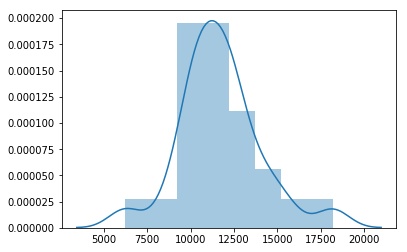

In [23]:
model_mean_price
sns.distplot(model_mean_price) 

#### Majority of the cars have a mean price of 10,000.

In [24]:
# aggregate  price based on age  --> max, min and average price

### 5) What is the minimum, average and maximum price when aggregated by manufacturer and make year?

In [25]:
model_all_price = df_2.pivot_table(values='Price', index=['Manufacturer',"Make Year"], aggfunc=[np.min,np.mean,np.max])
model_all_price = round(model_all_price,2)
model_all_price = model_all_price.sort_values(by = ["Manufacturer","Make Year"], ascending = False)
model_all_price.head(30)


amin      mean   amax
                        Price     Price  Price
Manufacturer Make Year                        
volkswagen   2019       12999  12999.00  12999
             2018       16630  18306.67  20500
             2017       15360  16316.25  18220
             2016       10450  12750.00  15880
             2015       10900  13573.75  15840
             2014       11980  11980.00  11980
             2013        9775  10491.67  10950
             2012        4000   8385.60  11950
             2011       11955  11955.00  11955
             2010        5499   5499.00   5499
             2009        3000   3875.00   4950
             2008        5800   5800.00   5800
             2006        2950   2950.00   2950
             2004        2200   2566.67   3000
             2003        1600   1750.00   1900
             2001        1500   1972.50   2695
             2000        3500   3500.00   3500
             1993        4400   4400.00   4400
toyota       2018       16750  18895.00  19980
             2017       12998  18338.12  28000
             2016        9999  16520.24  28500
             2015       10990  17108.87  25950
             2014        9899  12711.25  15360
             2013        5999  12071.50  18500
             2012        8950  12187.75  18410
             2011       10200  10200.00  10200
             2010        5040  11680.50  22082
             2009        3600   6900.00  12000
             2008        2500   6741.62  15500
             2007        4500   5338.33   6615

### 6) What is the minimum, average and maximum price when aggregated by make year ?

In [26]:
model_price_age = df_2.pivot_table(values='Price', index="Make Year", aggfunc=[np.min,np.mean,np.max])
model_price_age = round(model_price_age,2)
model_price_age = model_price_age.sort_values(by = "Make Year", ascending = False)
model_price_age

,amin,mean,amax
,Price,Price,Price
Make Year,,,
2019,4198,18243.55,27999
2018,3999,19637.14,79495
2017,9040,18592.24,35499
2016,4995,16921.98,35999
2015,3598,16233.30,34999
2014,1575,15186.52,35000
2013,1200,12610.38,22950
2012,3780,10997.93,34000


### 7)  Price of each manufacturers by make year

In [27]:
model_all_price = df_2.pivot_table(values='Price', index=["Make Year", "Manufacturer"], aggfunc=[np.min,np.mean,np.max])
model_all_price = round(model_all_price,2)
model_all_price = model_all_price.sort_values(by = ["Make Year",("mean","Price")], ascending = False)
model_all_price = model_all_price[model_all_price["mean","Price"] != 4198]
model_all_price.head(20)

amin      mean   amax
                         Price     Price  Price
Make Year Manufacturer                         
2019      honda          20999  20999.00  20999
          ford           18740  20559.86  27999
          mini           19580  19580.00  19580
          nissan         18999  19489.50  19980
          kia            19450  19450.00  19450
          jeep           17950  19369.75  19999
          chevrolet      18520  18890.00  19260
          volkswagen     12999  12999.00  12999
          hyundai        12375  12987.50  13600
2018      lincoln        79495  79495.00  79495
          mercedes-benz  38950  38950.00  38950
          lexus          26400  30200.00  34000
          bmw             4198  28899.00  53600
          jeep           17790  25065.00  33395
          subaru         17999  20804.25  23550
          chrysler       18770  19477.50  19930
          ford           11740  19438.94  41999
          toyota         16750  18895.00  19980
          buick          17310  18625.00  19940
          volkswagen     16630  18306.67  20500